In [2]:
pip install nsepython nsetools nselib nseta


  Using cached nseta-0.7.386-py3-none-any.whl.metadata (141 kB)
  Using cached backtrader-1.9.78.123-py2.py3-none-any.whl.metadata (6.8 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached cachecontrol-0.14.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached ccxt-4.3.65-py2.py3-none-any.whl.metadata (115 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached croniter-2.0.7-py2.py3-none-any.whl.metadata (27 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached pybind11-2.13.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached pre_commit-3.7.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached aiodns-3.2

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [4 lines of output]
  C:\Users\surve\AppData\Local\Temp\pip-install-e2mpuvz2\pystan_00db508bf1c7432b9e2ee5c47e8a4e90\setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
    self.version = node.value.s
  Cython>=0.22 and NumPy are required.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [4]:
pip install cython numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nsepython import nsefetch
from nsetools import Nse
import numpy as np

# Function to fetch historical data
def get_historical_data(symbol):
    url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from=01-01-2023&to=31-12-2023"
    print(f"URL: {url}")
    data = nsefetch(url)
    print("Raw Data:", data)
    return pd.DataFrame(data['data'])

# Fetch Nifty data and inspect
nifty_historical = get_historical_data('NIFTY 50')



URL: https://www.nseindia.com/api/historical/cm/equity?symbol=NIFTY 50&series=[%22EQ%22]&from=01-01-2023&to=31-12-2023
Raw Data: {'data': [], 'meta': {'series': ['EQ'], 'fromDate': '01-01-2023', 'toDate': '31-12-2023', 'symbols': ['NIFTY 50']}}


URL: https://www.nseindia.com/api/historical/cm/equity?symbol=RELIANCE&series=[%22EQ%22]&from=01-01-2023&to=31-12-2023
Data Sample: {'_id': '658eb4febc28d99b03074c96', 'CH_SYMBOL': 'RELIANCE', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 2614, 'CH_TRADE_LOW_PRICE': 2579.3, 'CH_OPENING_PRICE': 2611.1, 'CH_CLOSING_PRICE': 2584.95, 'CH_LAST_TRADED_PRICE': 2587, 'CH_PREVIOUS_CLS_PRICE': 2605.55, 'CH_TOT_TRADED_QTY': 5432292, 'CH_TOT_TRADED_VAL': 14067490670.9, 'CH_52WEEK_HIGH_PRICE': 2630.95, 'CH_52WEEK_LOW_PRICE': 2220.3, 'CH_TOTAL_TRADES': 248419, 'CH_ISIN': 'INE002A01018', 'CH_TIMESTAMP': '2023-12-29', 'TIMESTAMP': '2023-12-28T18:30:00.000Z', 'createdAt': '2023-12-29T12:01:02.813Z', 'updatedAt': '2023-12-29T12:01:02.813Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 2589.61, 'mTIMESTAMP': '29-Dec-2023'}
Columns: Index(['_id', 'CH_SYMBOL', 'CH_SERIES', 'CH_MARKET_TYPE',
       'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_OPENING_PRICE',
       'CH_CLOSING_PRICE', 'CH

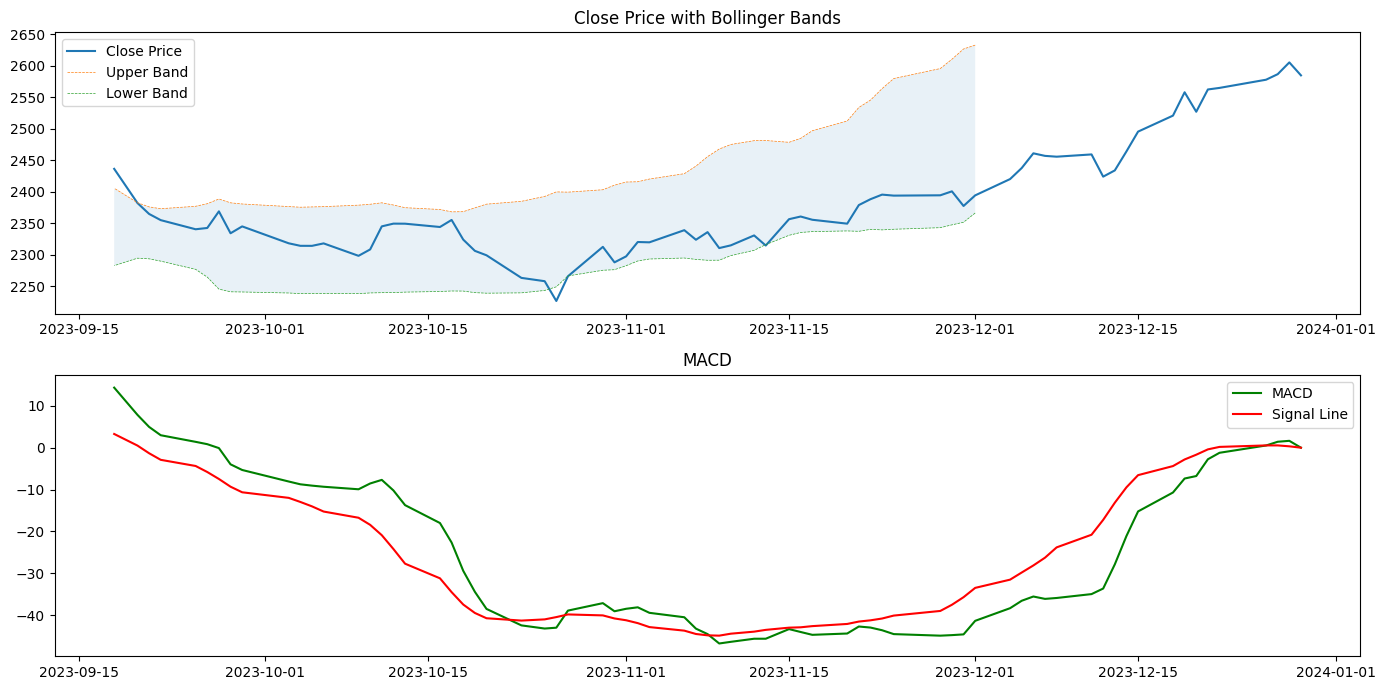

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from nsepython import nsefetch
import numpy as np

# Function to fetch historical data
def get_historical_data(symbol):
    url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from=01-01-2023&to=31-12-2023"
    print(f"URL: {url}")
    data = nsefetch(url)
    if 'data' in data and len(data['data']) > 0:
        print("Data Sample:", data['data'][0])  # Print the first element of the data to inspect its structure
        return pd.DataFrame(data['data'])
    else:
        print("No data available")
        return pd.DataFrame()  # Return an empty DataFrame if no data is available

# Fetch historical data for RELIANCE
historical_data = get_historical_data('RELIANCE')

# Proceed if data is available
if not historical_data.empty:
    # Inspect the columns
    print("Columns:", historical_data.columns)
    print("Data Sample:", historical_data.head())
    
    # Assuming the correct column names
    historical_data['TIMESTAMP'] = pd.to_datetime(historical_data['CH_TIMESTAMP'])
    historical_data.set_index('TIMESTAMP', inplace=True)

    # Calculate MACD
    historical_data['EMA_12'] = historical_data['CH_CLOSING_PRICE'].ewm(span=12, adjust=False).mean()
    historical_data['EMA_26'] = historical_data['CH_CLOSING_PRICE'].ewm(span=26, adjust=False).mean()
    historical_data['MACD'] = historical_data['EMA_12'] - historical_data['EMA_26']
    historical_data['Signal_Line'] = historical_data['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    historical_data['20_MA'] = historical_data['CH_CLOSING_PRICE'].rolling(window=20).mean()
    historical_data['20_STD'] = historical_data['CH_CLOSING_PRICE'].rolling(window=20).std()
    historical_data['Upper_Band'] = historical_data['20_MA'] + (historical_data['20_STD'] * 2)
    historical_data['Lower_Band'] = historical_data['20_MA'] - (historical_data['20_STD'] * 2)

    # Plot the results
    plt.figure(figsize=(14,7))
    plt.subplot(2, 1, 1)
    plt.plot(historical_data['CH_CLOSING_PRICE'], label='Close Price')
    plt.plot(historical_data['Upper_Band'], label='Upper Band', linestyle='--', linewidth=0.5)
    plt.plot(historical_data['Lower_Band'], label='Lower Band', linestyle='--', linewidth=0.5)
    plt.fill_between(historical_data.index, historical_data['Upper_Band'], historical_data['Lower_Band'], alpha=0.1)
    plt.title('Close Price with Bollinger Bands')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(historical_data['MACD'], label='MACD', color='g')
    plt.plot(historical_data['Signal_Line'], label='Signal Line', color='r')
    plt.title('MACD')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No historical data available for RELIANCE.")


Fetching data from 01-01-2013 to 26-01-2013
Fetching data from 27-01-2013 to 21-02-2013
Fetching data from 22-02-2013 to 19-03-2013
Fetching data from 20-03-2013 to 14-04-2013
Fetching data from 15-04-2013 to 10-05-2013
Fetching data from 11-05-2013 to 05-06-2013
Fetching data from 06-06-2013 to 01-07-2013
Fetching data from 02-07-2013 to 27-07-2013
Fetching data from 28-07-2013 to 22-08-2013
Fetching data from 23-08-2013 to 17-09-2013
Fetching data from 18-09-2013 to 13-10-2013
Fetching data from 14-10-2013 to 08-11-2013
Fetching data from 09-11-2013 to 04-12-2013
Fetching data from 05-12-2013 to 30-12-2013
Fetching data from 31-12-2013 to 25-01-2014
Fetching data from 26-01-2014 to 20-02-2014
Fetching data from 21-02-2014 to 18-03-2014
Fetching data from 19-03-2014 to 13-04-2014
Fetching data from 14-04-2014 to 09-05-2014
Fetching data from 10-05-2014 to 04-06-2014
Fetching data from 05-06-2014 to 30-06-2014
Fetching data from 01-07-2014 to 26-07-2014
Fetching data from 27-07-2014 to

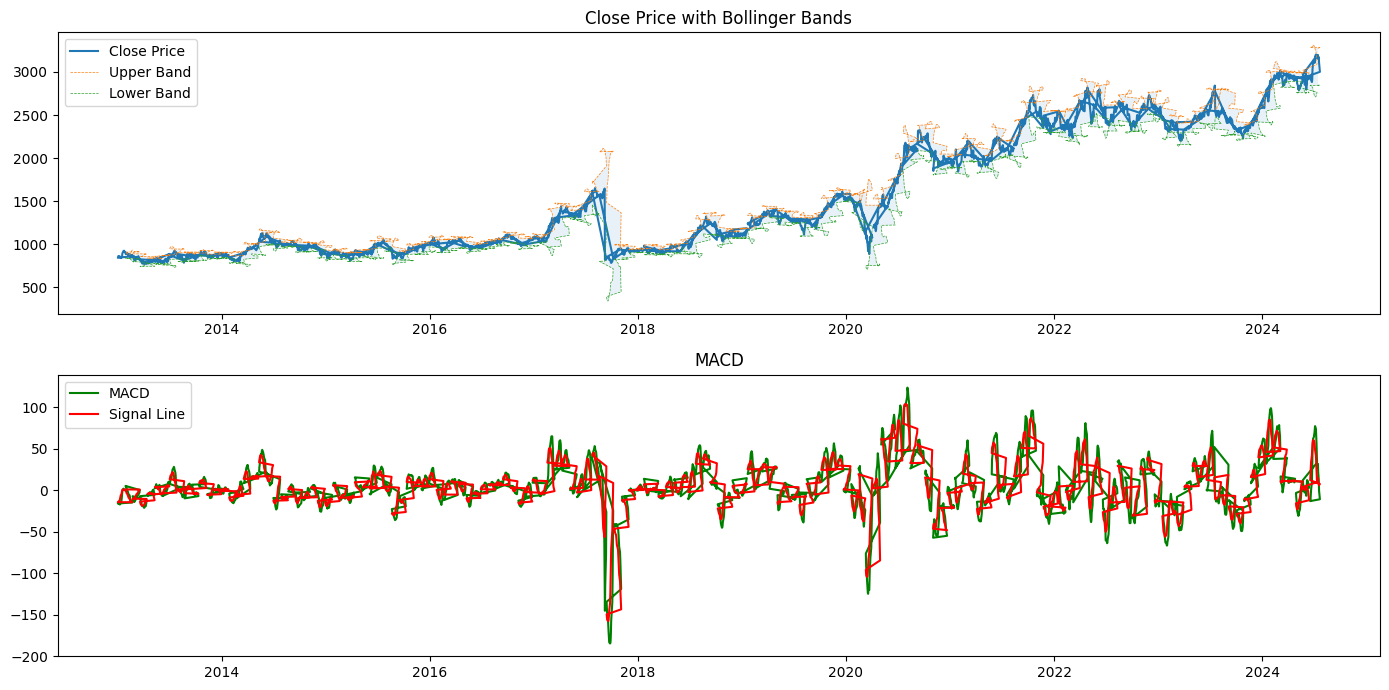

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from nsepython import nsefetch
import numpy as np
from datetime import datetime, timedelta

# Function to fetch historical data in chunks of 25 days
def get_historical_data_chunked(symbol, start_date, end_date):
    historical_data = pd.DataFrame()
    current_start_date = start_date
    
    while current_start_date < end_date:
        current_end_date = current_start_date + timedelta(days=25)
        if current_end_date > end_date:
            current_end_date = end_date

        url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from={current_start_date.strftime('%d-%m-%Y')}&to={current_end_date.strftime('%d-%m-%Y')}"
        print(f"Fetching data from {current_start_date.strftime('%d-%m-%Y')} to {current_end_date.strftime('%d-%m-%Y')}")
        data = nsefetch(url)
        if 'data' in data and len(data['data']) > 0:
            chunk_df = pd.DataFrame(data['data'])
            historical_data = pd.concat([historical_data, chunk_df], ignore_index=True)
        
        current_start_date = current_end_date + timedelta(days=1)  # Move to the next chunk

    return historical_data

# Fetch historical data for RELIANCE from the last 10 years
start_date = datetime.strptime('01-01-2013', '%d-%m-%Y')
end_date = datetime.now()

historical_data = get_historical_data_chunked('RELIANCE', start_date, end_date)

# Proceed if data is available
if not historical_data.empty:
    # Inspect the columns
    print("Columns:", historical_data.columns)
    print("Data Sample:", historical_data.head())
    
    # Assuming the correct column names
    historical_data['TIMESTAMP'] = pd.to_datetime(historical_data['CH_TIMESTAMP'])
    historical_data.set_index('TIMESTAMP', inplace=True)

    # Calculate MACD
    historical_data['EMA_12'] = historical_data['CH_CLOSING_PRICE'].ewm(span=12, adjust=False).mean()
    historical_data['EMA_26'] = historical_data['CH_CLOSING_PRICE'].ewm(span=26, adjust=False).mean()
    historical_data['MACD'] = historical_data['EMA_12'] - historical_data['EMA_26']
    historical_data['Signal_Line'] = historical_data['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    historical_data['20_MA'] = historical_data['CH_CLOSING_PRICE'].rolling(window=20).mean()
    historical_data['20_STD'] = historical_data['CH_CLOSING_PRICE'].rolling(window=20).std()
    historical_data['Upper_Band'] = historical_data['20_MA'] + (historical_data['20_STD'] * 2)
    historical_data['Lower_Band'] = historical_data['20_MA'] - (historical_data['20_STD'] * 2)

    # Plot the results
    plt.figure(figsize=(14,7))
    plt.subplot(2, 1, 1)
    plt.plot(historical_data['CH_CLOSING_PRICE'], label='Close Price')
    plt.plot(historical_data['Upper_Band'], label='Upper Band', linestyle='--', linewidth=0.5)
    plt.plot(historical_data['Lower_Band'], label='Lower Band', linestyle='--', linewidth=0.5)
    plt.fill_between(historical_data.index, historical_data['Upper_Band'], historical_data['Lower_Band'], alpha=0.1)
    plt.title('Close Price with Bollinger Bands')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(historical_data['MACD'], label='MACD', color='g')
    plt.plot(historical_data['Signal_Line'], label='Signal Line', color='r')
    plt.title('MACD')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("No historical data available for RELIANCE.")


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch historical data in chunks of 25 days
def get_historical_data_chunked(symbol, start_date, end_date):
    historical_data = pd.DataFrame()
    current_start_date = start_date
    
    while current_start_date < end_date:
        current_end_date = current_start_date + timedelta(days=25)
        if current_end_date > end_date:
            current_end_date = end_date

        url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from={current_start_date.strftime('%d-%m-%Y')}&to={current_end_date.strftime('%d-%m-%Y')}"
        print(f"Fetching data from {current_start_date.strftime('%d-%m-%Y')} to {current_end_date.strftime('%d-%m-%Y')}")
        data = nsefetch(url)
        if 'data' in data and len(data['data']) > 0:
            chunk_df = pd.DataFrame(data['data'])
            historical_data = pd.concat([historical_data, chunk_df], ignore_index=True)
        
        current_start_date = current_end_date + timedelta(days=1)  # Move to the next chunk

    return historical_data

# Function to calculate MACD and Bollinger Bands
def calculate_macd_and_bollinger_bands(df):
    # Calculate MACD
    df['EMA_12'] = df['CH_CLOSING_PRICE'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['CH_CLOSING_PRICE'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    df['20_MA'] = df['CH_CLOSING_PRICE'].rolling(window=20).mean()
    df['20_STD'] = df['CH_CLOSING_PRICE'].rolling(window=20).std()
    df['Upper_Band'] = df['20_MA'] + (df['20_STD'] * 2)
    df['Lower_Band'] = df['20_MA'] - (df['20_STD'] * 2)

    return df

# Function to generate trading signals
def generate_signals(df):
    signals = []

    # Loop through data to generate buy/sell signals
    for i in range(1, len(df)):
        row = df.iloc[i]
        prev_row = df.iloc[i-1]
        
        # MACD Strategy
        if (prev_row['MACD'] < prev_row['Signal_Line'] and 
            row['MACD'] > row['Signal_Line']):
            signals.append({
                'Time': row.name,
                'Price': row['CH_CLOSING_PRICE'],
                'Signal': 'Buy'
            })
        elif (prev_row['MACD'] > prev_row['Signal_Line'] and 
              row['MACD'] < row['Signal_Line']):
            signals.append({
                'Time': row.name,
                'Price': row['CH_CLOSING_PRICE'],
                'Signal': 'Sell'
            })
        
        # Bollinger Bands Strategy
        if row['CH_CLOSING_PRICE'] < row['Lower_Band']:
            signals.append({
                'Time': row.name,
                'Price': row['CH_CLOSING_PRICE'],
                'Signal': 'Buy'
            })
        elif row['CH_CLOSING_PRICE'] > row['Upper_Band']:
            signals.append({
                'Time': row.name,
                'Price': row['CH_CLOSING_PRICE'],
                'Signal': 'Sell'
            })

    return pd.DataFrame(signals)

# Fetch historical data for RELIANCE from the last 10 years
start_date = datetime.strptime('01-01-2013', '%d-%m-%Y')
end_date = datetime.now()

historical_data = get_historical_data_chunked('RELIANCE', start_date, end_date)

# Proceed if data is available
if not historical_data.empty:
    # Inspect the columns
    print("Columns:", historical_data.columns)
    print("Data Sample:", historical_data.head())
    
    # Assuming the correct column names
    historical_data['TIMESTAMP'] = pd.to_datetime(historical_data['CH_TIMESTAMP'])
    historical_data.set_index('TIMESTAMP', inplace=True)

    # Apply calculations
    historical_data = calculate_macd_and_bollinger_bands(historical_data)

    # Generate trading signals
    trading_signals = generate_signals(historical_data)
    
    # Merge signals with historical_data
    historical_data = historical_data.reset_index()
    merged_data = pd.merge(historical_data, trading_signals, left_on='TIMESTAMP', right_on='Time', how='left')

    # Save the combined DataFrame to a CSV file
    merged_data.to_csv('historical_data_with_signals.csv', index=False)
    print("Historical data with trading signals saved to 'historical_data_with_signals.csv'.")
else:
    print("No historical data available for RELIANCE.")


Fetching data from 01-01-2013 to 26-01-2013
Fetching data from 27-01-2013 to 21-02-2013
Fetching data from 22-02-2013 to 19-03-2013
Fetching data from 20-03-2013 to 14-04-2013
Fetching data from 15-04-2013 to 10-05-2013
Fetching data from 11-05-2013 to 05-06-2013
Fetching data from 06-06-2013 to 01-07-2013
Fetching data from 02-07-2013 to 27-07-2013
Fetching data from 28-07-2013 to 22-08-2013
Fetching data from 23-08-2013 to 17-09-2013
Fetching data from 18-09-2013 to 13-10-2013
Fetching data from 14-10-2013 to 08-11-2013
Fetching data from 09-11-2013 to 04-12-2013
Fetching data from 05-12-2013 to 30-12-2013
Fetching data from 31-12-2013 to 25-01-2014
Fetching data from 26-01-2014 to 20-02-2014
Fetching data from 21-02-2014 to 18-03-2014
Fetching data from 19-03-2014 to 13-04-2014
Fetching data from 14-04-2014 to 09-05-2014
Fetching data from 10-05-2014 to 04-06-2014
Fetching data from 05-06-2014 to 30-06-2014
Fetching data from 01-07-2014 to 26-07-2014
Fetching data from 27-07-2014 to

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch historical data in chunks of 25 days
def get_historical_data_chunked(symbol, start_date, end_date):
    historical_data = pd.DataFrame()
    current_start_date = start_date
    
    while current_start_date < end_date:
        current_end_date = current_start_date + timedelta(days=25)
        if current_end_date > end_date:
            current_end_date = end_date

        url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from={current_start_date.strftime('%d-%m-%Y')}&to={current_end_date.strftime('%d-%m-%Y')}"
        print(f"Fetching data from {current_start_date.strftime('%d-%m-%Y')} to {current_end_date.strftime('%d-%m-%Y')}")
        data = nsefetch(url)
        if 'data' in data and len(data['data']) > 0:
            chunk_df = pd.DataFrame(data['data'])
            historical_data = pd.concat([historical_data, chunk_df], ignore_index=True)
        
        current_start_date = current_end_date + timedelta(days=1)  # Move to the next chunk

    return historical_data

# Function to calculate MACD and Bollinger Bands
def calculate_macd_and_bollinger_bands(df):
    # Calculate MACD
    df['EMA_12'] = df['CH_CLOSING_PRICE'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['CH_CLOSING_PRICE'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    df['20_MA'] = df['CH_CLOSING_PRICE'].rolling(window=20).mean()
    df['20_STD'] = df['CH_CLOSING_PRICE'].rolling(window=20).std()
    df['Upper_Band'] = df['20_MA'] + (df['20_STD'] * 2)
    df['Lower_Band'] = df['20_MA'] - (df['20_STD'] * 2)

    return df

# Function to generate trading signals and calculate profit/loss
def generate_signals_with_profit_loss(df):
    signals = []
    entry_price = None
    entry_time = None
    last_signal = None

    # Loop through data to generate buy/sell signals
    for i in range(1, len(df)):
        row = df.iloc[i]
        prev_row = df.iloc[i-1]
        
        # MACD Strategy
        if (prev_row['MACD'] < prev_row['Signal_Line'] and 
            row['MACD'] > row['Signal_Line']):
            if last_signal == 'Sell' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Buy'

        elif (prev_row['MACD'] > prev_row['Signal_Line'] and 
              row['MACD'] < row['Signal_Line']):
            if last_signal == 'Buy' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': entry_price,
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': np.nan,
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Sell'
        
        # Bollinger Bands Strategy
        if row['CH_CLOSING_PRICE'] < row['Lower_Band']:
            if last_signal == 'Sell' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Buy'

        elif row['CH_CLOSING_PRICE'] > row['Upper_Band']:
            if last_signal == 'Buy' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': entry_price,
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': np.nan,
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Sell'

    return pd.DataFrame(signals)

# Fetch historical data for RELIANCE from the last 10 years
start_date = datetime.strptime('01-01-2013', '%d-%m-%Y')
end_date = datetime.now()

historical_data = get_historical_data_chunked('RELIANCE', start_date, end_date)

# Proceed if data is available
if not historical_data.empty:
    # Inspect the columns
    print("Columns:", historical_data.columns)
    print("Data Sample:", historical_data.head())
    
    # Assuming the correct column names
    historical_data['TIMESTAMP'] = pd.to_datetime(historical_data['CH_TIMESTAMP'])
    historical_data.set_index('TIMESTAMP', inplace=True)

    # Apply calculations
    historical_data = calculate_macd_and_bollinger_bands(historical_data)

    # Generate trading signals with profit/loss
    trading_signals = generate_signals_with_profit_loss(historical_data)
    
    # Merge signals with historical_data
    historical_data = historical_data.reset_index()
    merged_data = pd.merge(historical_data, trading_signals, left_on='TIMESTAMP', right_on='Time', how='left')

    # Save the combined DataFrame to a CSV file
    merged_data.to_csv('historical_data_with_signals_and_profit_loss.csv', index=False)
    print("Historical data with trading signals and profit/loss saved to 'historical_data_with_signals_and_profit_loss.csv'.")
else:
    print("No historical data available for RELIANCE.")


Fetching data from 01-01-2013 to 26-01-2013
Fetching data from 27-01-2013 to 21-02-2013
Fetching data from 22-02-2013 to 19-03-2013
Fetching data from 20-03-2013 to 14-04-2013
Fetching data from 15-04-2013 to 10-05-2013
Fetching data from 11-05-2013 to 05-06-2013
Fetching data from 06-06-2013 to 01-07-2013
Fetching data from 02-07-2013 to 27-07-2013
Fetching data from 28-07-2013 to 22-08-2013
Fetching data from 23-08-2013 to 17-09-2013
Fetching data from 18-09-2013 to 13-10-2013
Fetching data from 14-10-2013 to 08-11-2013
Fetching data from 09-11-2013 to 04-12-2013
Fetching data from 05-12-2013 to 30-12-2013
Fetching data from 31-12-2013 to 25-01-2014
Fetching data from 26-01-2014 to 20-02-2014
Fetching data from 21-02-2014 to 18-03-2014
Fetching data from 19-03-2014 to 13-04-2014
Fetching data from 14-04-2014 to 09-05-2014
Fetching data from 10-05-2014 to 04-06-2014
Fetching data from 05-06-2014 to 30-06-2014
Fetching data from 01-07-2014 to 26-07-2014
Fetching data from 27-07-2014 to

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch historical data in chunks of 25 days
def get_historical_data_chunked(symbol, start_date, end_date):
    historical_data = pd.DataFrame()
    current_start_date = start_date
    
    while current_start_date < end_date:
        current_end_date = current_start_date + timedelta(days=25)
        if current_end_date > end_date:
            current_end_date = end_date

        url = f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from={current_start_date.strftime('%d-%m-%Y')}&to={current_end_date.strftime('%d-%m-%Y')}"
        print(f"Fetching data from {current_start_date.strftime('%d-%m-%Y')} to {current_end_date.strftime('%d-%m-%Y')}")
        data = nsefetch(url)
        if 'data' in data and len(data['data']) > 0:
            chunk_df = pd.DataFrame(data['data'])
            historical_data = pd.concat([historical_data, chunk_df], ignore_index=True)
        
        current_start_date = current_end_date + timedelta(days=1)  # Move to the next chunk

    return historical_data

# Function to calculate MACD and Bollinger Bands
def calculate_macd_and_bollinger_bands(df):
    # Calculate MACD
    df['EMA_12'] = df['CH_CLOSING_PRICE'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['CH_CLOSING_PRICE'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Calculate Bollinger Bands
    df['20_MA'] = df['CH_CLOSING_PRICE'].rolling(window=20).mean()
    df['20_STD'] = df['CH_CLOSING_PRICE'].rolling(window=20).std()
    df['Upper_Band'] = df['20_MA'] + (df['20_STD'] * 2)
    df['Lower_Band'] = df['20_MA'] - (df['20_STD'] * 2)

    return df

# Function to generate trading signals and calculate profit/loss
def generate_signals_with_profit_loss(df):
    signals = []
    entry_price = None
    entry_time = None
    last_signal = None

    # Loop through data to generate buy/sell signals
    for i in range(1, len(df)):
        row = df.iloc[i]
        prev_row = df.iloc[i-1]
        
        # MACD Strategy
        if (prev_row['MACD'] < prev_row['Signal_Line'] and 
            row['MACD'] > row['Signal_Line']):
            if last_signal == 'Sell' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Buy'

        elif (prev_row['MACD'] > prev_row['Signal_Line'] and 
              row['MACD'] < row['Signal_Line']):
            if last_signal == 'Buy' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': entry_price,
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': np.nan,
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Sell'
        
        # Bollinger Bands Strategy
        if row['CH_CLOSING_PRICE'] < row['Lower_Band']:
            if last_signal == 'Sell' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Buy',
                    'Entry_Price': row['CH_CLOSING_PRICE'],
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Buy'

        elif row['CH_CLOSING_PRICE'] > row['Upper_Band']:
            if last_signal == 'Buy' and entry_price is not None:
                profit_loss = ((row['CH_CLOSING_PRICE'] - entry_price) / entry_price) * 100
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': entry_price,
                    'Profit_Loss': profit_loss
                })
            else:
                signals.append({
                    'Time': row.name,
                    'Price': row['CH_CLOSING_PRICE'],
                    'Signal': 'Sell',
                    'Entry_Price': np.nan,
                    'Profit_Loss': np.nan
                })
            entry_price = row['CH_CLOSING_PRICE']
            entry_time = row.name
            last_signal = 'Sell'

    signals_df = pd.DataFrame(signals)

    # Calculate Win Rate, Average % Profit, Average Drawdown, % Drawdown
    win_signals = signals_df[signals_df['Profit_Loss'] > 0]
    loss_signals = signals_df[signals_df['Profit_Loss'] < 0]
    num_trades = len(signals_df)
    num_wins = len(win_signals)
    num_losses = len(loss_signals)

    win_rate = (num_wins / num_trades) * 100 if num_trades > 0 else 0
    avg_profit = win_signals['Profit_Loss'].mean() if not win_signals.empty else 0
    avg_loss = loss_signals['Profit_Loss'].mean() if not loss_signals.empty else 0

    # Calculate Drawdown
    signals_df['Cumulative_Profit_Loss'] = signals_df['Profit_Loss'].cumsum()
    drawdowns = signals_df['Cumulative_Profit_Loss'] - signals_df['Cumulative_Profit_Loss'].cummax()
    avg_drawdown = drawdowns.mean()
    percent_drawdown = (avg_drawdown / signals_df['Cumulative_Profit_Loss'].max()) * 100 if signals_df['Cumulative_Profit_Loss'].max() != 0 else 0

    # Append metrics to signals DataFrame
    metrics = {
        'Win_Rate (%)': win_rate,
        'Avg_Profit (%)': avg_profit,
        'Avg_Loss (%)': avg_loss,
        'Avg_Drawdown': avg_drawdown,
        'Percent_Drawdown (%)': percent_drawdown
    }
    metrics_df = pd.DataFrame([metrics])
    
    return signals_df, metrics_df

# Fetch historical data for RELIANCE from the last 10 years
start_date = datetime.strptime('01-01-2013', '%d-%m-%Y')
end_date = datetime.now()

historical_data = get_historical_data_chunked('RELIANCE', start_date, end_date)

# Proceed if data is available
if not historical_data.empty:
    # Inspect the columns
    print("Columns:", historical_data.columns)
    print("Data Sample:", historical_data.head())
    
    # Assuming the correct column names
    historical_data['TIMESTAMP'] = pd.to_datetime(historical_data['CH_TIMESTAMP'])
    historical_data.set_index('TIMESTAMP', inplace=True)

    # Apply calculations
    historical_data = calculate_macd_and_bollinger_bands(historical_data)

    # Generate trading signals with profit/loss and calculate metrics
    trading_signals, metrics = generate_signals_with_profit_loss(historical_data)
    
    # Merge signals with historical_data
    historical_data = historical_data.reset_index()
    merged_data = pd.merge(historical_data, trading_signals, left_on='TIMESTAMP', right_on='Time', how='left')

    # Save the combined DataFrame and metrics to CSV files
    merged_data.to_csv('historical_data_with_signals_and_profit_loss.csv', index=False)
    metrics.to_csv('trading_metrics.csv', index=False)

    print("Historical data with trading signals and profit/loss saved to 'historical_data_with_signals_and_profit_loss.csv'.")
    print("Trading metrics saved to 'trading_metrics.csv'.")
else:
    print("No historical data available for RELIANCE.")


Fetching data from 01-01-2013 to 26-01-2013
Fetching data from 27-01-2013 to 21-02-2013
Fetching data from 22-02-2013 to 19-03-2013
Fetching data from 20-03-2013 to 14-04-2013
Fetching data from 15-04-2013 to 10-05-2013
Fetching data from 11-05-2013 to 05-06-2013
Fetching data from 06-06-2013 to 01-07-2013
Fetching data from 02-07-2013 to 27-07-2013
Fetching data from 28-07-2013 to 22-08-2013
Fetching data from 23-08-2013 to 17-09-2013
Fetching data from 18-09-2013 to 13-10-2013
Fetching data from 14-10-2013 to 08-11-2013
Fetching data from 09-11-2013 to 04-12-2013
Fetching data from 05-12-2013 to 30-12-2013
Fetching data from 31-12-2013 to 25-01-2014
Fetching data from 26-01-2014 to 20-02-2014
Fetching data from 21-02-2014 to 18-03-2014
Fetching data from 19-03-2014 to 13-04-2014
Fetching data from 14-04-2014 to 09-05-2014
Fetching data from 10-05-2014 to 04-06-2014
Fetching data from 05-06-2014 to 30-06-2014
Fetching data from 01-07-2014 to 26-07-2014
Fetching data from 27-07-2014 to

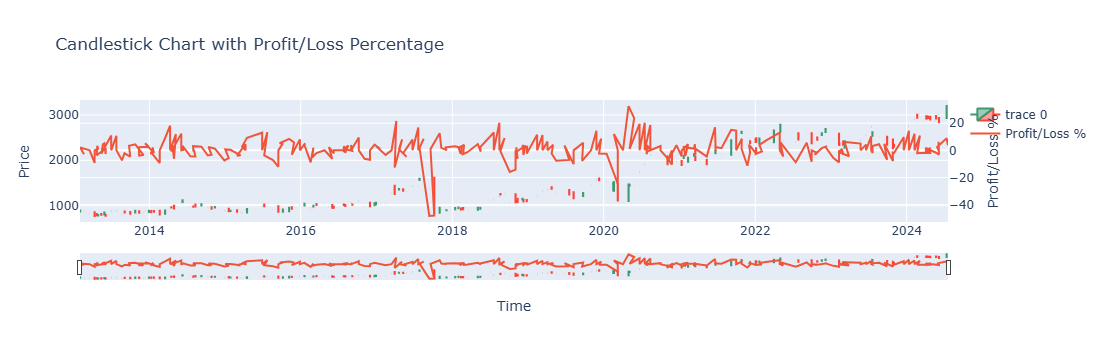

In [50]:
import pandas as pd
import plotly.graph_objects as go

# Load the Excel file
file_path = r'C:\Users\surve\OneDrive\Desktop\Github Repository\Jupyter Notebook\Algo perf.xlsx'
df = pd.read_excel(file_path)

# Ensure the dataframe has the necessary columns
required_columns = ['Time', 'Price', 'Signal', 'Entry_Price', 'Profit_Loss', 'Cumulative_Profit_Loss']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {', '.join(required_columns)}")

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Time'],
                                     open=df['Entry_Price'],
                                     high=df['Price'],
                                     low=df['Price'],
                                     close=df['Price'])])

# Add profit/loss percentage on the y-axis
# Assuming 'Profit_Loss' is already in percentage
fig.update_layout(
    yaxis=dict(title='Price'),
    yaxis2=dict(title='Profit/Loss %', overlaying='y', side='right'),
    title='Candlestick Chart with Profit/Loss Percentage',
    xaxis_title='Time',
)

# Add traces for Profit/Loss
fig.add_trace(go.Scatter(x=df['Time'], y=df['Profit_Loss'], mode='lines', name='Profit/Loss %', yaxis='y2'))

fig.show()


Win Rate: 20.00%
Average Profit: -1.97
Average Drawdown: -6.03


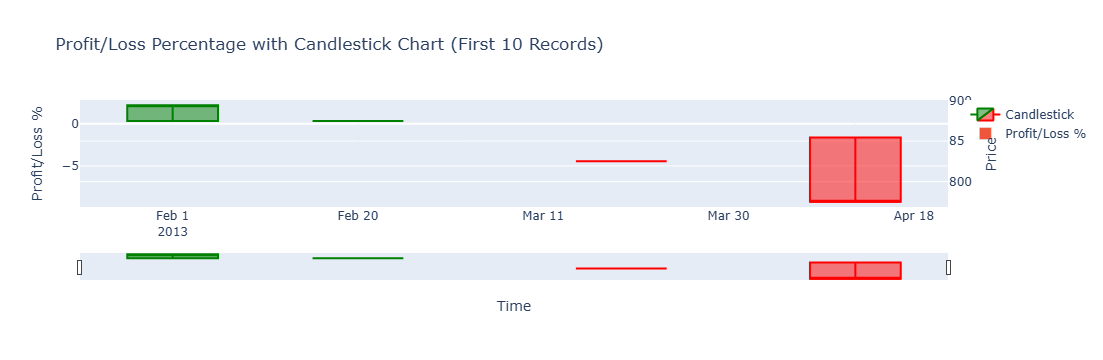

Win Rate (including zero trades): 64.43%
Loss Rate (excluding zero trades): 35.57%
Average Profit (Geometric Mean): 4.68%
Average Drawdown (Geometric Mean): 3.77%
Longest Win Streak: 18 records
Longest Loss Streak: 4 records


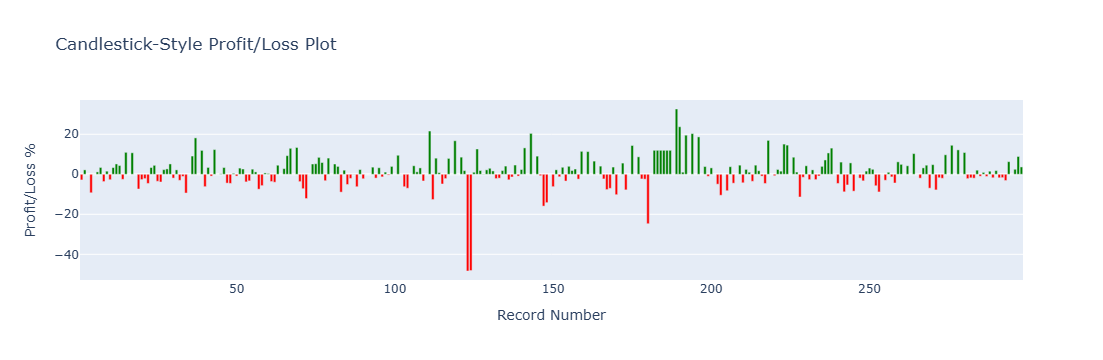

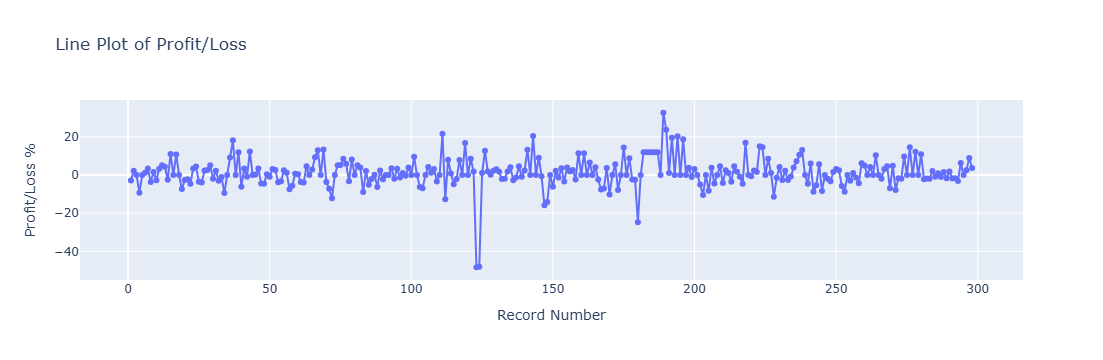

In [102]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the Excel file
file_path = r'C:\Users\surve\OneDrive\Desktop\Github Repository\Jupyter Notebook\Algo perf.xlsx'
df = pd.read_excel(file_path)

# Ensure the dataframe has the necessary columns
required_columns = ['Time', 'Price', 'Signal', 'Entry_Price', 'Profit_Loss', 'Cumulative_Profit_Loss']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"The Excel file must contain the following columns: {', '.join(required_columns)}")

# Create record numbers for the x-axis
df['Record_Number'] = range(1, len(df) + 1)

# Calculate metrics
total_trades = len(df)
winning_trades = df[df['Profit_Loss'] >= 0]  # Include zero trades as wins
losing_trades = df[df['Profit_Loss'] < 0]
zero_trades = df[df['Profit_Loss'] == 0]

# Win Rate (including zero trades as wins)
win_rate = len(winning_trades) / total_trades * 100

# Loss Rate (excluding zero trades)
loss_rate = len(losing_trades) / (total_trades ) * 100 if total_trades > len(zero_trades) else 0

# Average Profit (Geometric Mean of positive profits)
positive_profits = df['Profit_Loss'][df['Profit_Loss'] > 0]
avg_profit = np.exp(np.mean(np.log(positive_profits + 1))) - 1  # Adding 1 to avoid log(0)

# Average Drawdown (Geometric Mean of negative drawdowns)
negative_drawdowns = df['Profit_Loss'][df['Profit_Loss'] < 0]
avg_drawdown = np.exp(np.mean(np.log(-negative_drawdowns + 1))) - 1  # Adding 1 to avoid log(0)

# Calculate longest win streak and longest loss streak
def longest_streak(values, condition):
    streaks = []
    current_streak = 0
    for value in values:
        if condition(value):
            current_streak += 1
        else:
            if current_streak > 0:
                streaks.append(current_streak)
            current_streak = 0
    if current_streak > 0:
        streaks.append(current_streak)
    return max(streaks, default=0)

longest_win_streak = longest_streak(df['Profit_Loss'], lambda x: x >= 0)
longest_loss_streak = longest_streak(df['Profit_Loss'], lambda x: x < 0)

# Print the metrics
print(f"Win Rate (including zero trades): {win_rate:.2f}%")
print(f"Loss Rate (excluding zero trades): {loss_rate:.2f}%")
print(f"Average Profit (Geometric Mean): {avg_profit:.2f}%")
print(f"Average Drawdown (Geometric Mean): {avg_drawdown:.2f}%")
print(f"Longest Win Streak: {longest_win_streak} records")
print(f"Longest Loss Streak: {longest_loss_streak} records")

# Create the candlestick-style chart for profit/loss
colors = ['green' if profit > 0 else 'red' for profit in df['Profit_Loss']]

# Candlestick-style plot
fig_candle = go.Figure()

fig_candle.add_trace(go.Bar(
    x=df['Record_Number'],
    y=df['Profit_Loss'],
    marker_color=colors,
    name='Profit/Loss %'
))

fig_candle.update_layout(
    yaxis=dict(title='Profit/Loss %'),
    xaxis_title='Record Number',
    title='Candlestick-Style Profit/Loss Plot'
)

# Line plot
fig_line = go.Figure()

fig_line.add_trace(go.Scatter(
    x=df['Record_Number'],
    y=df['Profit_Loss'],
    mode='lines+markers',
    name='Profit/Loss %'
))

fig_line.update_layout(
    yaxis=dict(title='Profit/Loss %'),
    xaxis_title='Record Number',
    title='Line Plot of Profit/Loss'
)

# Show the plots
fig_candle.show()
fig_line.show()
